In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = 'song_data.csv'
df = pd.read_csv(file_path)

In [4]:
X = df[['song_duration_ms', 'acousticness', 'danceability', 'energy', 
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 
        'audio_valence']]

y = df['song_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

In [5]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [6]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 17.19050982819729
Mean Squared Error: 462.7021257197936
Root Mean Squared Error: 21.510511981814698


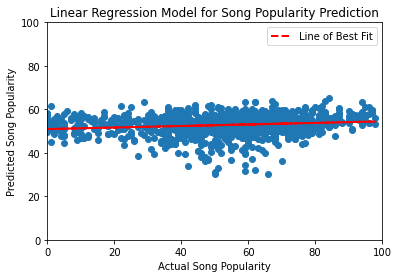

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title('Linear Regression Model for Song Popularity Prediction')


plt.xlim(0, 100)
plt.ylim(0, 100)


# Add line of best fit
coefficients = np.polyfit(y_test, y_pred, 1)
line = np.poly1d(coefficients)

plt.plot(y_test, line(y_test), color='red', linestyle='--', linewidth=2, label='Line of Best Fit')

plt.legend()
plt.show()